In [1]:
import os,datetime,sys,fnmatch
from netCDF4 import Dataset
import numpy as np
from pyhdf.SD import SD, SDC

In [2]:
dataset = Dataset('MOD06_L2.A2000182.0315.006.2014294093530.hdf')
#print(dataset.variables.keys())
pix_lat = dataset.variables['Latitude'][:]
#print(pix_lat)
print(pix_lat.shape)
pix_lg = dataset.variables['Longitude'][:]
#print(pix_lg)
print(pix_lg.shape)
pix_cot= dataset.variables['Cloud_Optical_Thickness'][:]

print(pix_cot)
print(pix_cot.shape)

pixle_cm=dataset.variables['Cloud_Mask_1km'][:]

print(pixle_cm.shape)

MOD03_dataset = Dataset('MOD03.A2000182.0315.006.2012253190540.hdf')
pix_lat = MOD03_dataset.variables['Latitude'][:]
print("the lat shap is %d %d"%(pix_lat.shape[0], pix_lat.shape[1]))
np.savetxt('granule_lat.txt', pix_lat, delimiter=',')
pix_lg = MOD03_dataset.variables['Longitude'][:]
print("the lng shap is %d %d"%(pix_lg.shape[0], pix_lg.shape[1]))

#np.savetxt('granule_lng.txt', pix_lg, delimiter=',')

#np.savetxt('cot.txt', pix_cot[600:1000, 300:600], delimiter=',')


print(pix_cot)
print(pix_cot.shape)

(406, 270)
(406, 270)
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- 46.22999896667898 ... -- -- --]
 [-- -- 54.009998792782426 ... -- -- --]
 [-- -- 34.91999921947718 ... -- -- --]]
(2030, 1354)
(2030, 1354, 2)
the lat shap is 2030 1354
the lng shap is 2030 1354
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- 46.22999896667898 ... -- -- --]
 [-- -- 54.009998792782426 ... -- -- --]
 [-- -- 34.91999921947718 ... -- -- --]]
(2030, 1354)


-49.855335
-28.392595
86.863235
119.89161
-39.123966217041016
103.37742614746094
2748620
2748620
x limit is 2030
y limit is 1354
-28.392595
95.64466
-28.392595
95.64466
-45.32218
86.863235
-49.855335
118.19102
-49.855335
118.19102


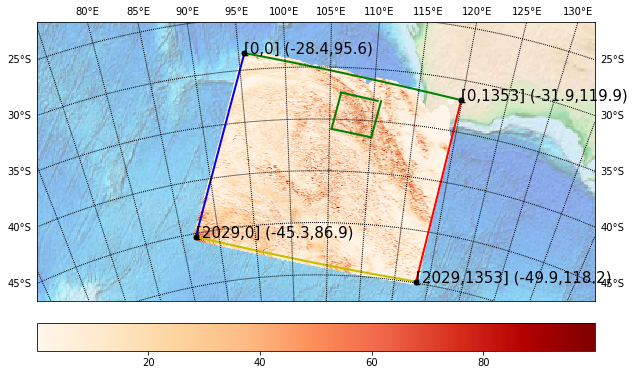

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

l_0=np.min(pix_lat.ravel())
l_x=np.max(pix_lat.ravel())

print(l_0)
print(l_x)


g_0=np.min(pix_lg.ravel())
g_x=np.max(pix_lg.ravel())

print(g_0)
print(g_x)

print((l_0+l_x)/2)
print((g_0+g_x)/2)

lat = pix_lat.ravel()
lon = pix_lg.ravel()

print(len(lat))
print(len(lon))
cot=pix_cot.ravel()


fig = plt.figure(figsize=(10, 8))
#m = Basemap(projection='lcc', resolution=None, width=6E6, height=4E6, 
#            lat_0= 15, lon_0= 170)

m = Basemap(projection='lcc', resolution=None, width=6E6, height=3E6, 
            lat_0= (l_0+l_x)/2, lon_0= (g_0+g_x)/2)


m.etopo(scale=0.5, alpha=0.5)


x_d=pix_lat.shape[0]
print('x limit is %d'%(x_d))

y_d=pix_lat.shape[1]
print('y limit is %d'%(y_d))


print(pix_lat[0,0])
print(pix_lg[0,0])



nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
print(nylat)
print(nylon)
# lonlat, lonlon are lat/lon of London.
lonlat = pix_lat[x_d-1,0]; lonlon=pix_lg[x_d-1,0]
print(lonlat)
print(lonlon)
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b') # blue is the first column


nylat = pix_lat[0,y_d-1]; nylon = pix_lg[0,y_d-1]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)

print(lonlon)
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r') # red is the last column




nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
lonlat = pix_lat[0,y_d-1]; lonlon=pix_lg[0,y_d-1]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g') # green is the first row


nylat = pix_lat[x_d-1,0]; nylon = pix_lg[x_d-1,0]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)
print(lonlon)
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='y')# yellow is the last row






x=pix_lat[0,0]
y=pix_lg[0,0]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,0] (%5.1f,%3.1f)' % (x, y), fontsize=15)


x=pix_lat[0,y_d-1]
y=pix_lg[0,y_d-1]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,%d] (%5.1f,%3.1f)' % (y_d-1, x, y), fontsize=15)




x=pix_lat[x_d-1, y_d-1]
y=pix_lg[x_d-1, y_d-1]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,%d] (%5.1f,%3.1f)' % (x_d-1, y_d-1, x, y), fontsize=15)



x=pix_lat[x_d-1,0]
y=pix_lg[x_d-1,0]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,0] (%5.1f,%3.1f)' % (x_d-1, x, y), fontsize=15)







m.drawparallels(np.arange(-90,90,5),labels=[1,1,0,0])

m.drawmeridians(np.arange(-180,180,5),labels=[0,0,1,0])



llat, llon=m(lon, lat)
cotaj=cot/np.max(cot)

sc=m.scatter(llat, llon, c=cot, cmap='OrRd')

cbar = plt.colorbar(orientation='horizontal', shrink=1, aspect=20, fraction=0.1,pad=0.05)




nylat = pix_lat[200,600]; nylon = pix_lg[200,600]
lonlat = pix_lat[600,600]; lonlon=pix_lg[600,600]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[200,600]; nylon = pix_lg[200,600]
lonlat = pix_lat[200,1000]; lonlon=pix_lg[400,1000]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[600,600]; nylon = pix_lg[600,600]
lonlat = pix_lat[600,1000]; lonlon=pix_lg[600,1000]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[200,1000]; nylon = pix_lg[200,1000]
lonlat = pix_lat[600,1000]; lonlon=pix_lg[600,1000]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')





plt.show()

-49.855335
-28.392595
86.863235
119.89161
-39.123966217041016
103.37742614746094
2748620
2748620
x limit is 2030
y limit is 1354
-28.392595
95.64466
-28.392595
95.64466
-45.32218
86.863235
-49.855335
118.19102
-49.855335
118.19102


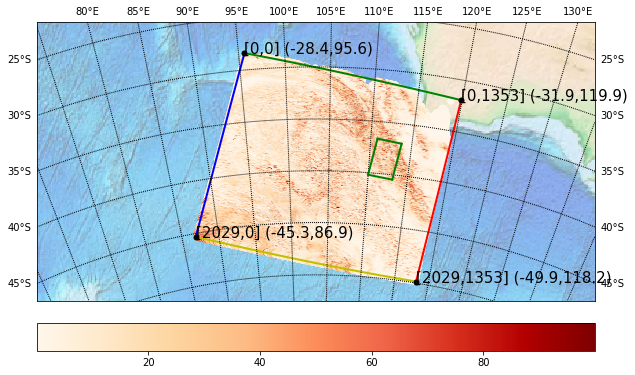

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

l_0=np.min(pix_lat.ravel())
l_x=np.max(pix_lat.ravel())

print(l_0)
print(l_x)


g_0=np.min(pix_lg.ravel())
g_x=np.max(pix_lg.ravel())

print(g_0)
print(g_x)

print((l_0+l_x)/2)
print((g_0+g_x)/2)

lat = pix_lat.ravel()
lon = pix_lg.ravel()

print(len(lat))
print(len(lon))
cot=pix_cot.ravel()


fig = plt.figure(figsize=(10, 8))
#m = Basemap(projection='lcc', resolution=None, width=6E6, height=4E6, 
#            lat_0= 15, lon_0= 170)

mm = Basemap(projection='lcc', resolution=None, width=6E6, height=3E6, 
            lat_0= (l_0+l_x)/2, lon_0= (g_0+g_x)/2)


mm.etopo(scale=0.5, alpha=0.5)


x_d=pix_lat.shape[0]
print('x limit is %d'%(x_d))

y_d=pix_lat.shape[1]
print('y limit is %d'%(y_d))


print(pix_lat[0,0])
print(pix_lg[0,0])



nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
print(nylat)
print(nylon)
# lonlat, lonlon are lat/lon of London.
lonlat = pix_lat[x_d-1,0]; lonlon=pix_lg[x_d-1,0]
print(lonlat)
print(lonlon)
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b') # blue is the first column


nylat = pix_lat[0,y_d-1]; nylon = pix_lg[0,y_d-1]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)

print(lonlon)
# draw great circle route between NY and London
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r') # red is the last column




nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
lonlat = pix_lat[0,y_d-1]; lonlon=pix_lg[0,y_d-1]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g') # green is the first row


nylat = pix_lat[x_d-1,0]; nylon = pix_lg[x_d-1,0]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)
print(lonlon)
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='y')# yellow is the last row






x=pix_lat[0,0]
y=pix_lg[0,0]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,0] (%5.1f,%3.1f)' % (x, y), fontsize=15)


x=pix_lat[0,y_d-1]
y=pix_lg[0,y_d-1]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,%d] (%5.1f,%3.1f)' % (y_d-1, x, y), fontsize=15)




x=pix_lat[x_d-1, y_d-1]
y=pix_lg[x_d-1, y_d-1]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,%d] (%5.1f,%3.1f)' % (x_d-1, y_d-1, x, y), fontsize=15)



x=pix_lat[x_d-1,0]
y=pix_lg[x_d-1,0]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,0] (%5.1f,%3.1f)' % (x_d-1, x, y), fontsize=15)







mm.drawparallels(np.arange(-90,90,5),labels=[1,1,0,0])

mm.drawmeridians(np.arange(-180,180,5),labels=[0,0,1,0])



llat, llon=mm(lon, lat)
cotaj=cot/np.max(cot)

sc=mm.scatter(llat, llon, c=cot, cmap='OrRd')

cbar = plt.colorbar(orientation='horizontal', shrink=1, aspect=20, fraction=0.1,pad=0.05)




nylat = pix_lat[600,1050]; nylon = pix_lg[600,1050]
lonlat = pix_lat[1000,1050]; lonlon=pix_lg[1000,1050]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[600, 1050]; nylon = pix_lg[600,1050]
lonlat = pix_lat[600,1200]; lonlon=pix_lg[600,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[1000,1050]; nylon = pix_lg[1000,1050]
lonlat = pix_lat[1000,1200]; lonlon=pix_lg[1000,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[600,1200]; nylon = pix_lg[600,1200]
lonlat = pix_lat[1000,1200]; lonlon=pix_lg[1000,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')





plt.show()

-49.855335
-28.392595
86.863235
119.89161
-39.123966217041016
103.37742614746094
2748620
2748620
x limit is 2030
y limit is 1354
-28.392595
95.64466
-28.392595
95.64466
-45.32218
86.863235
-49.855335
118.19102
-49.855335
118.19102


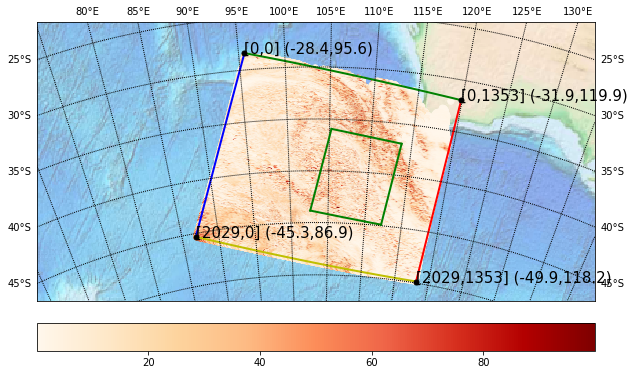

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

l_0=np.min(pix_lat.ravel())
l_x=np.max(pix_lat.ravel())

print(l_0)
print(l_x)


g_0=np.min(pix_lg.ravel())
g_x=np.max(pix_lg.ravel())

print(g_0)
print(g_x)

print((l_0+l_x)/2)
print((g_0+g_x)/2)

lat = pix_lat.ravel()
lon = pix_lg.ravel()

print(len(lat))
print(len(lon))
cot=pix_cot.ravel()


fig = plt.figure(figsize=(10, 8))
#m = Basemap(projection='lcc', resolution=None, width=6E6, height=4E6, 
#            lat_0= 15, lon_0= 170)

mm = Basemap(projection='lcc', resolution=None, width=6E6, height=3E6, 
            lat_0= (l_0+l_x)/2, lon_0= (g_0+g_x)/2)


mm.etopo(scale=0.5, alpha=0.5)


x_d=pix_lat.shape[0]
print('x limit is %d'%(x_d))

y_d=pix_lat.shape[1]
print('y limit is %d'%(y_d))


print(pix_lat[0,0])
print(pix_lg[0,0])



nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
print(nylat)
print(nylon)
# lonlat, lonlon are lat/lon of London.
lonlat = pix_lat[x_d-1,0]; lonlon=pix_lg[x_d-1,0]
print(lonlat)
print(lonlon)
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b') # blue is the first column


nylat = pix_lat[0,y_d-1]; nylon = pix_lg[0,y_d-1]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)

print(lonlon)
# draw great circle route between NY and London
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r') # red is the last column




nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
lonlat = pix_lat[0,y_d-1]; lonlon=pix_lg[0,y_d-1]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g') # green is the first row


nylat = pix_lat[x_d-1,0]; nylon = pix_lg[x_d-1,0]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)
print(lonlon)
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='y')# yellow is the last row






x=pix_lat[0,0]
y=pix_lg[0,0]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,0] (%5.1f,%3.1f)' % (x, y), fontsize=15)


x=pix_lat[0,y_d-1]
y=pix_lg[0,y_d-1]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,%d] (%5.1f,%3.1f)' % (y_d-1, x, y), fontsize=15)




x=pix_lat[x_d-1, y_d-1]
y=pix_lg[x_d-1, y_d-1]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,%d] (%5.1f,%3.1f)' % (x_d-1, y_d-1, x, y), fontsize=15)



x=pix_lat[x_d-1,0]
y=pix_lg[x_d-1,0]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,0] (%5.1f,%3.1f)' % (x_d-1, x, y), fontsize=15)







mm.drawparallels(np.arange(-90,90,5),labels=[1,1,0,0])

mm.drawmeridians(np.arange(-180,180,5),labels=[0,0,1,0])



llat, llon=mm(lon, lat)
cotaj=cot/np.max(cot)

sc=mm.scatter(llat, llon, c=cot, cmap='OrRd')

cbar = plt.colorbar(orientation='horizontal', shrink=1, aspect=20, fraction=0.1,pad=0.05)




nylat = pix_lat[600,600]; nylon = pix_lg[600,600]
lonlat = pix_lat[1500,600]; lonlon=pix_lg[1500,600]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[600, 600]; nylon = pix_lg[600,600]
lonlat = pix_lat[600,1200]; lonlon=pix_lg[600,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[1500,600]; nylon = pix_lg[1500,600]
lonlat = pix_lat[1500,1200]; lonlon=pix_lg[1500,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[600,1200]; nylon = pix_lg[600,1200]
lonlat = pix_lat[1500,1200]; lonlon=pix_lg[1500,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')





plt.show()

In [24]:
file_ll = np.array([0, 0])

cot_files = np.array(["The file list of cot"]) #
cer_files = np.array(["The file list of cer"])

pix_cer= dataset.variables['Cloud_Effective_Radius'][:]

print(pix_cer.shape)

f_n='MOD06_L2.A2000182.0315.'






for i in range(0, 18):
    for j in range(0, 12):
        x= 600+i*50           #row number of the first element of the 50 by 50 area
        y= 600+j*50           #column
        new_ll  = np.array([x, y])
        file_ll = np.vstack((file_ll, new_ll))
        
        cot_px=pix_cot[x:(x+50) , y:(y+50)]
        output_fp = f_n+'_cot_{:04d}_{:04}.txt'.format(x, y)
        #cot_mt=pix_lat[x:(x+51), y:(y+51)]
        #print('x is %d '%(x))
        #print('x+50 is %d '%(x+50))
        #print(len(cot_px[1 ,: ]))
        #print(cot_px.shape)
        np.savetxt(output_fp, cot_px, delimiter=',')
        
        cot_file_name=np.array([output_fp])
        cot_files=np.vstack((cot_files, cot_file_name))
        
 
        
        cot_cer=pix_cer[x:(x+50) , y:(y+50)]
        output_cer_fp = f_n+'_cer_{:04d}_{:04}.txt'.format(x, y)
        np.savetxt(output_cer_fp,cot_cer, delimiter=',')
        
        cer_file_name=np.array([output_cer_fp])
        cer_files=np.vstack((cer_files, cer_file_name))        
        
        
        
file_ll  =np.delete(file_ll, (0), axis=0)     
print(file_ll)
np.savetxt(f_n+'file_row_col_list.txt', file_ll, delimiter=',')    

cot_files =np.delete(cot_files, (0), axis=0)     
print(cot_files)

np.savetxt(f_n+'file_cot_list.txt', cot_files, delimiter=", ", fmt="%s")


cer_files =np.delete(cer_files, (0), axis=0)     
print(cer_files)

np.savetxt(f_n+'file_cer_list.txt', cer_files, delimiter=", ", fmt="%s")

(2030, 1354)
[[ 600  600]
 [ 600  650]
 [ 600  700]
 [ 600  750]
 [ 600  800]
 [ 600  850]
 [ 600  900]
 [ 600  950]
 [ 600 1000]
 [ 600 1050]
 [ 600 1100]
 [ 600 1150]
 [ 650  600]
 [ 650  650]
 [ 650  700]
 [ 650  750]
 [ 650  800]
 [ 650  850]
 [ 650  900]
 [ 650  950]
 [ 650 1000]
 [ 650 1050]
 [ 650 1100]
 [ 650 1150]
 [ 700  600]
 [ 700  650]
 [ 700  700]
 [ 700  750]
 [ 700  800]
 [ 700  850]
 [ 700  900]
 [ 700  950]
 [ 700 1000]
 [ 700 1050]
 [ 700 1100]
 [ 700 1150]
 [ 750  600]
 [ 750  650]
 [ 750  700]
 [ 750  750]
 [ 750  800]
 [ 750  850]
 [ 750  900]
 [ 750  950]
 [ 750 1000]
 [ 750 1050]
 [ 750 1100]
 [ 750 1150]
 [ 800  600]
 [ 800  650]
 [ 800  700]
 [ 800  750]
 [ 800  800]
 [ 800  850]
 [ 800  900]
 [ 800  950]
 [ 800 1000]
 [ 800 1050]
 [ 800 1100]
 [ 800 1150]
 [ 850  600]
 [ 850  650]
 [ 850  700]
 [ 850  750]
 [ 850  800]
 [ 850  850]
 [ 850  900]
 [ 850  950]
 [ 850 1000]
 [ 850 1050]
 [ 850 1100]
 [ 850 1150]
 [ 900  600]
 [ 900  650]
 [ 900  700]
 [ 900  750]

In [25]:
cot_fn=np.genfromtxt(f_n+'file_cot_list.txt', dtype='str', delimiter='\n')
cer_fn=np.genfromtxt(f_n+'file_cer_list.txt', dtype='str', delimiter='\n')

flg=len(cot_fn)

final_file_cot_list=np.array(['The final cot file list'])
final_file_cer_list=np.array(['The final cer file list'])


for i in range(0,flg):
    cloud_cot=np.loadtxt(cot_fn[i], delimiter=',')
    sta_cot=cloud_cot.ravel()
    cloud_cer=np.loadtxt(cer_fn[i], delimiter=',')
    sta_cer=cloud_cot.ravel()
    
    if ( (not (np.sum(sta_cot==-9999)>1)) and (not (np.sum(sta_cer==-9999)>1)) ):
        print(i)
        print(cot_fn[i])
        print(cer_fn[i])
        final_file_cot_list = np.vstack((final_file_cot_list, cot_fn[i]))
        final_file_cer_list = np.vstack((final_file_cer_list, cer_fn[i]))
        
final_file_cot_list  =np.delete(final_file_cot_list, (0), axis=0)     
np.savetxt(f_n+'final_file_cot_list.txt', final_file_cot_list, delimiter=',', fmt="%s")

final_file_cer_list  =np.delete(final_file_cer_list, (0), axis=0)     
np.savetxt(f_n+'final_file_cer_list.txt', final_file_cer_list, delimiter=',', fmt="%s")
        
    
    
final_cot_fn=np.genfromtxt(f_n+'final_file_cot_list.txt', dtype='str', delimiter='\n') # read cot file name list 
final_cer_fn=np.genfromtxt(f_n+'final_file_cer_list.txt', dtype='str', delimiter='\n') # read corresponding ccer file name list

f_num=len(final_cot_fn)  # find the number of files in the list

for i in range(0, f_num):
    cloud_cot=np.loadtxt(final_cot_fn[i], delimiter=',')
    cloud_cer=np.loadtxt(final_cer_fn[i], delimiter=',')
    sta_cot=cloud_cot.ravel()
    sta_cer=cloud_cer.ravel()
    if ((not (np.sum(sta_cot==-9999)>1)) and (not (np.sum(sta_cer==-9999)>1))) :  # check if there is missing values
        print(i)             
        print(cloud_cot.shape)                                                    # check if it is 50 by 50  
        print(cloud_cer.shape)                                                    # check if it is 50 by 50 
        print(final_cot_fn[i])
        print(final_cer_fn[i])

C:\Users\LLB\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: genfromtxt: Empty input file: "MOD06_L2.A2000182.0315.final_file_cot_list.txt"
C:\Users\LLB\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: genfromtxt: Empty input file: "MOD06_L2.A2000182.0315.final_file_cer_list.txt"


-52.425823
-30.883228
142.4383
176.87192
-41.65452575683594
159.6551055908203
2667380
2667380
-30.883228
151.96155
99.76999776996672
-30.883228
151.96155
-47.66831
142.4383
-52.425694
175.35333
-52.425694
175.35333


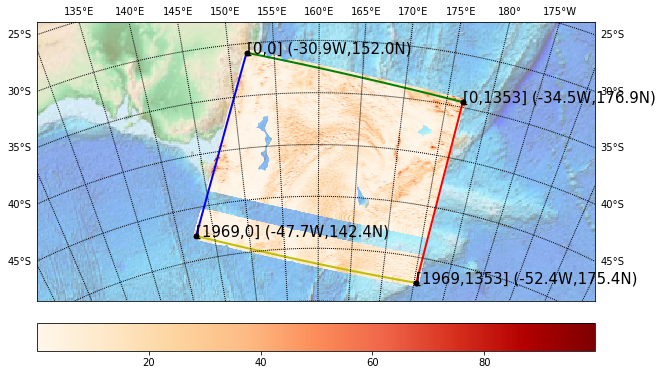

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

l_0=np.min(pix_lat.ravel())
l_x=np.max(pix_lat.ravel())

print(l_0)
print(l_x)


g_0=np.min(pix_lg.ravel())
g_x=np.max(pix_lg.ravel())

print(g_0)
print(g_x)

print((l_0+l_x)/2)
print((g_0+g_x)/2)

lat = pix_lat.ravel()
lon = pix_lg.ravel()

print(len(lat))
print(len(lon))
cot=pix_cot.ravel()


fig = plt.figure(figsize=(10, 8))
#m = Basemap(projection='lcc', resolution=None, width=6E6, height=4E6, 
#            lat_0= 15, lon_0= 170)

m = Basemap(projection='lcc', resolution=None, width=6E6, height=3E6, 
            lat_0= (l_0+l_x)/2, lon_0= (g_0+g_x)/2)


m.etopo(scale=0.5, alpha=0.5)


print(pix_lat[0,0])
print(pix_lg[0,0])

print(np.max(cot))

nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
print(nylat)
print(nylon)
# lonlat, lonlon are lat/lon of London.
lonlat = pix_lat[1969,0]; lonlon=pix_lg[1969,0]
print(lonlat)
print(lonlon)
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b') # blue is the first column


nylat = pix_lat[0,1353]; nylon = pix_lg[0,1353]
lonlat = pix_lat[1969,1353]; lonlon=pix_lg[1969,1353]
print(lonlat)

print(lonlon)
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r') # red is the last column




nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
lonlat = pix_lat[0,1353]; lonlon=pix_lg[0,1353]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g') # green is the first row


nylat = pix_lat[1969,0]; nylon = pix_lg[1969,0]
lonlat = pix_lat[1969,1353]; lonlon=pix_lg[1969,1353]
print(lonlat)
print(lonlon)
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='y')# yellow is the last row

x=pix_lat[0,0]
y=pix_lg[0,0]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,0] (%5.1fW,%3.1fN)' % (x, y), fontsize=15)


x=pix_lat[0,1353]
y=pix_lg[0,1353]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,1353] (%5.1fW,%3.1fN)' % (x, y), fontsize=15)




x=pix_lat[1969,1353]
y=pix_lg[1969,1353]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[1969,1353] (%5.1fW,%3.1fN)' % (x, y), fontsize=15)



x=pix_lat[1969,0]
y=pix_lg[1969,0]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[1969,0] (%5.1fW,%3.1fN)' % (x, y), fontsize=15)

m.drawparallels(np.arange(-90,90,5),labels=[1,1,0,0])

m.drawmeridians(np.arange(-180,180,5),labels=[0,0,1,0])


llat, llon=m(lon, lat)
cotaj=cot/np.max(cot)

sc=m.scatter(llat, llon, c=cot, cmap='OrRd')

cbar = plt.colorbar(orientation='horizontal', shrink=1, aspect=20, fraction=0.1,pad=0.05)




#nylat = pix_lat[500,200]; nylon = pix_lg[500,200]
#lonlat = pix_lat[500,900]; lonlon=pix_lg[500,900]
#m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


#nylat = pix_lat[500,200]; nylon = pix_lg[500,200]
#lonlat = pix_lat[1200,200]; lonlon=pix_lg[1200,200]
#m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


#nylat = pix_lat[1200,200]; nylon = pix_lg[1200,200]
#lonlat = pix_lat[1200,900]; lonlon=pix_lg[1200,900]
#m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


#nylat = pix_lat[500,900]; nylon = pix_lg[500,900]
#lonlat = pix_lat[1200,900]; lonlon=pix_lg[1200,900]
#m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')





plt.show()



In [20]:
file_ll = np.array([0, 0])

cot_files = np.array(["The file list of cot"]) #
cer_files = np.array(["The file list of cer"])

pix_cer= dataset.variables['Cloud_Effective_Radius'][:]

print(pix_cer.shape)

f_n='MOD06_L2.A2000306.2325.'




#500 1200
#200 900 

for i in range(0, 14):
    for j in range(0, 7):
        x= 500+i*50           #row number of the first element of the 50 by 50 area
        y= 200+j*50           #column
        new_ll  = np.array([x, y])
        file_ll = np.vstack((file_ll, new_ll))
        
        cot_px=pix_cot[x:(x+50) , y:(y+50)]
        output_fp = f_n+'_cot_{:04d}_{:04}.txt'.format(x, y)
        #cot_mt=pix_lat[x:(x+51), y:(y+51)]
        #print('x is %d '%(x))
        #print('x+50 is %d '%(x+50))
        #print(len(cot_px[1 ,: ]))
        #print(cot_px.shape)
        np.savetxt(output_fp, cot_px, delimiter=',')
        
        cot_file_name=np.array([output_fp])
        cot_files=np.vstack((cot_files, cot_file_name))
        
 
        
        cot_cer=pix_cer[x:(x+50) , y:(y+50)]
        output_cer_fp = f_n+'_cer_{:04d}_{:04}.txt'.format(x, y)
        np.savetxt(output_cer_fp,cot_cer, delimiter=',')
        
        cer_file_name=np.array([output_cer_fp])
        cer_files=np.vstack((cer_files, cer_file_name))        
        
        
        
file_ll  =np.delete(file_ll, (0), axis=0)     
print(file_ll)
np.savetxt(f_n+'file_row_col_list.txt', file_ll, delimiter=',')    

cot_files =np.delete(cot_files, (0), axis=0)     
print(cot_files)

np.savetxt(f_n+'file_cot_list.txt', cot_files, delimiter=", ", fmt="%s")


cer_files =np.delete(cer_files, (0), axis=0)     
print(cer_files)

np.savetxt(f_n+'file_cer_list.txt', cer_files, delimiter=", ", fmt="%s")

(1970, 1354)
[[ 500  200]
 [ 500  250]
 [ 500  300]
 [ 500  350]
 [ 500  400]
 [ 500  450]
 [ 500  500]
 [ 550  200]
 [ 550  250]
 [ 550  300]
 [ 550  350]
 [ 550  400]
 [ 550  450]
 [ 550  500]
 [ 600  200]
 [ 600  250]
 [ 600  300]
 [ 600  350]
 [ 600  400]
 [ 600  450]
 [ 600  500]
 [ 650  200]
 [ 650  250]
 [ 650  300]
 [ 650  350]
 [ 650  400]
 [ 650  450]
 [ 650  500]
 [ 700  200]
 [ 700  250]
 [ 700  300]
 [ 700  350]
 [ 700  400]
 [ 700  450]
 [ 700  500]
 [ 750  200]
 [ 750  250]
 [ 750  300]
 [ 750  350]
 [ 750  400]
 [ 750  450]
 [ 750  500]
 [ 800  200]
 [ 800  250]
 [ 800  300]
 [ 800  350]
 [ 800  400]
 [ 800  450]
 [ 800  500]
 [ 850  200]
 [ 850  250]
 [ 850  300]
 [ 850  350]
 [ 850  400]
 [ 850  450]
 [ 850  500]
 [ 900  200]
 [ 900  250]
 [ 900  300]
 [ 900  350]
 [ 900  400]
 [ 900  450]
 [ 900  500]
 [ 950  200]
 [ 950  250]
 [ 950  300]
 [ 950  350]
 [ 950  400]
 [ 950  450]
 [ 950  500]
 [1000  200]
 [1000  250]
 [1000  300]
 [1000  350]
 [1000  400]
 [1000  450]

In [58]:
cot_fn=np.genfromtxt(f_n+'file_cot_list.txt', dtype='str', delimiter='\n')
cer_fn=np.genfromtxt(f_n+'file_cer_list.txt', dtype='str', delimiter='\n')

flg=len(cot_fn)

final_file_cot_list=np.array(['The final cot file list'])
final_file_cer_list=np.array(['The final cer file list'])


for i in range(0,flg):
    cloud_cot=np.loadtxt(cot_fn[i], delimiter=',')
    sta_cot=cloud_cot.ravel()
    cloud_cer=np.loadtxt(cer_fn[i], delimiter=',')
    sta_cer=cloud_cot.ravel()
    
    if ( (not (np.sum(sta_cot==-9999)>1)) and (not (np.sum(sta_cer==-9999)>1)) ):
        print(i)
        print(cot_fn[i])
        print(cer_fn[i])
        final_file_cot_list = np.vstack((final_file_cot_list, cot_fn[i]))
        final_file_cer_list = np.vstack((final_file_cer_list, cer_fn[i]))
        
final_file_cot_list  =np.delete(final_file_cot_list, (0), axis=0)     
np.savetxt('final_file_cot_list.txt', final_file_cot_list, delimiter=',', fmt="%s")

final_file_cer_list  =np.delete(final_file_cer_list, (0), axis=0)     
np.savetxt('final_file_cer_list.txt', final_file_cer_list, delimiter=',', fmt="%s")
        
    
    
final_cot_fn=np.genfromtxt('final_file_cot_list.txt', dtype='str', delimiter='\n') # read cot file name list 
final_cer_fn=np.genfromtxt('final_file_cer_list.txt', dtype='str', delimiter='\n') # read corresponding ccer file name list

f_num=len(final_cot_fn)  # find the number of files in the list

for i in range(0, f_num):
    cloud_cot=np.loadtxt(final_cot_fn[i], delimiter=',')
    cloud_cer=np.loadtxt(final_cer_fn[i], delimiter=',')
    sta_cot=cloud_cot.ravel()
    sta_cer=cloud_cer.ravel()
    if ((not (np.sum(sta_cot==-9999)>1)) and (not (np.sum(sta_cer==-9999)>1))) :  # check if there is missing values
        print(i)             
        print(cloud_cot.shape)                                                    # check if it is 50 by 50  
        print(cloud_cer.shape)                                                    # check if it is 50 by 50 
        print(final_cot_fn[i])
        print(final_cer_fn[i])
    
        

7
MOD06_L2.A2000306.2325._cot_0550_0200.txt
MOD06_L2.A2000306.2325._cer_0550_0200.txt
21
MOD06_L2.A2000306.2325._cot_0650_0200.txt
MOD06_L2.A2000306.2325._cer_0650_0200.txt
22
MOD06_L2.A2000306.2325._cot_0650_0250.txt
MOD06_L2.A2000306.2325._cer_0650_0250.txt
27
MOD06_L2.A2000306.2325._cot_0650_0500.txt
MOD06_L2.A2000306.2325._cer_0650_0500.txt
29
MOD06_L2.A2000306.2325._cot_0700_0250.txt
MOD06_L2.A2000306.2325._cer_0700_0250.txt
30
MOD06_L2.A2000306.2325._cot_0700_0300.txt
MOD06_L2.A2000306.2325._cer_0700_0300.txt
31
MOD06_L2.A2000306.2325._cot_0700_0350.txt
MOD06_L2.A2000306.2325._cer_0700_0350.txt
32
MOD06_L2.A2000306.2325._cot_0700_0400.txt
MOD06_L2.A2000306.2325._cer_0700_0400.txt
36
MOD06_L2.A2000306.2325._cot_0750_0250.txt
MOD06_L2.A2000306.2325._cer_0750_0250.txt
37
MOD06_L2.A2000306.2325._cot_0750_0300.txt
MOD06_L2.A2000306.2325._cer_0750_0300.txt
38
MOD06_L2.A2000306.2325._cot_0750_0350.txt
MOD06_L2.A2000306.2325._cer_0750_0350.txt
39
MOD06_L2.A2000306.2325._cot_0750_0400.txt